# 오픈소스 기반 RAG 파이프라인 구축 
### 참고  
- https://www.youtube.com/watch?v=a_zIs0KxLbc.  
- https://docling-project.github.io/docling/examples/rag_langchain/#ingestion
  
### 오픈소스 기술스택 
- Docling (문서 프로세싱) : https://github.com/docling-project/docling
- LangChain (LLM AI앱 개발) : https://github.com/langchain-ai/langchain   
- Milvus (벡터DB): https://github.com/milvus-io/milvus
- HuggingFace (AI모델) : https://huggingface.co/
- Ollama (LLM 로컬 실행): https://github.com/ollama/ollama
- Langfuse (모니터링): https://github.com/langfuse/langfuse


In [2]:
%pip install -qU docling pymilvus tf-keras langfuse 
%pip install -qU langchain langchain-docling langchain-huggingface langchain-milvus langchain-ollama


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### [Docling](https://github.com/docling-project/docling)
Docling은 PDF 등 다양한 문서 처리/파싱을 간소화 하고, AI 에코시스템과의 원활한 통합을 제공합니다.
<img src="https://github.com/docling-project/docling/raw/main/docs/assets/docling_processing.png" width="800"/>.   

🗂️ PDF, DOCX, XLSX, HTML, 이미지 등을 포함한 [여러 문서 형식 구문](https://docling-project.github.io/docling/usage/supported_formats/) 분석   
📑 페이지 레이아웃, 읽기 순서, 표 구조, 코드, 수식, 이미지 분류 등을 포함한 고급 PDF 이해  
🧬 통합되고 표현력이 뛰어난 [DoclingDocument](https://docling-project.github.io/docling/concepts/docling_document/) 표현 형식  
↪️ Markdown, HTML, 무손실 JSON을 포함한 다양한 내보내기 형식 및 옵션  
🔒 민감한 데이터 및 에어갭 환경을 위한 로컬 실행 기능  
🤖 LangChain, LlamaIndex, Crew AI 및 에이전트 AI를 위한 Haystack을 포함한 플러그 앤 플레이 통합  
🔍 스캔된 PDF 및 이미지에 대한 광범위한 OCR 지원   
🥚 시각적 언어 모델([SmolDocling](https://huggingface.co/ds4sd/SmolDocling-256M-preview)) 지원  
💻 간단하고 편리한 CLI 

macOS 인증서 업데이트    
/Applications/Python\ 3.12/Install\ Certificates.command

# 1. Docling 사용법 

## 1.1 문서변환(Document Conversion) 

In [3]:
pdf_file = "2025년 적용 최저임금 안내문.pdf"

In [4]:
from docling.document_converter import DocumentConverter

# source = "https://arxiv.org/pdf/2408.09869"  # document per local path or URL
source = pdf_file  
converter = DocumentConverter()
result = converter.convert(source)

In [5]:
print(result.document.export_to_markdown()) 

<!-- image -->

상담전화국번없이

<!-- image -->

## 서울지방고용노동청

| 서울지방고용노동청   | 02)2231-0009   | 서울남부지청   | 02)2639-2100   |
|----------------------|----------------|----------------|----------------|
| 서울강남지청         | 02)584-0009    | 서울북부지청   | 02)950-9880    |
| 서울동부지청         | 02)403-0009    | 서울관악지청   | 02)3281-0009   |
| 서울서부지청         | 02)713-0009    |                |                |

## 중부지방고용노동청

| 중부지방고용노동청   | 032)460-4545   | 안산지청   | 031)412-1992   |
|----------------------|----------------|------------|----------------|
| 인천북부지청         | 032)540-7910   | 평택지청   | 031)646-1114   |
| 부천지청             | 032)714-8700   | 강원지청   | 033)269-3551   |
| 의정부지청           | 031)877-0009   | 강릉지청   | 033)650-2500   |
| 고양지청             | 031)931-2800   | 원주지청   | 033)769-0800   |
| 경기지청             | 031)259-0204   | 태백지청   | 033)552-0009   |
| 성남지청             | 031)788-1505   | 영월출장소 | 033)374-0009   |
| 안양지청             | 031)463-7300   |            |                |

## 부산지방고용노동청



In [6]:
type(result)

docling.datamodel.document.ConversionResult

In [7]:
# result.document.export_to_dict()

## 1.2 테이블 추출 옵션
- PdfPipelineOptions에서 do_table_structure=True로 설정하여 테이블 구조 인식 활성화   

In [8]:
from docling.datamodel.base_models import InputFormat
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import PdfPipelineOptions, TableFormerMode

pipeline_options = PdfPipelineOptions(do_table_structure=True)
pipeline_options.table_structure_options.mode = TableFormerMode.ACCURATE

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

source = pdf_file
doc_converter = DocumentConverter()
doc_result = converter.convert(source)

In [9]:
print(doc_result.document.export_to_markdown())  

<!-- image -->

상담전화국번없이

<!-- image -->

## 서울지방고용노동청

| 서울지방고용노동청   | 02)2231-0009   | 서울남부지청   | 02)2639-2100   |
|----------------------|----------------|----------------|----------------|
| 서울강남지청         | 02)584-0009    | 서울북부지청   | 02)950-9880    |
| 서울동부지청         | 02)403-0009    | 서울관악지청   | 02)3281-0009   |
| 서울서부지청         | 02)713-0009    |                |                |

## 중부지방고용노동청

| 중부지방고용노동청   | 032)460-4545   | 안산지청   | 031)412-1992   |
|----------------------|----------------|------------|----------------|
| 인천북부지청         | 032)540-7910   | 평택지청   | 031)646-1114   |
| 부천지청             | 032)714-8700   | 강원지청   | 033)269-3551   |
| 의정부지청           | 031)877-0009   | 강릉지청   | 033)650-2500   |
| 고양지청             | 031)931-2800   | 원주지청   | 033)769-0800   |
| 경기지청             | 031)259-0204   | 태백지청   | 033)552-0009   |
| 성남지청             | 031)788-1505   | 영월출장소 | 033)374-0009   |
| 안양지청             | 031)463-7300   |            |                |

## 부산지방고용노동청



## 1.3 문서 청킹(Document Chunking)

In [10]:
from docling.document_converter import DocumentConverter
from docling.chunking import HybridChunker

conv_res = DocumentConverter().convert(pdf_file)
doc = conv_res.document

chunker = HybridChunker(
    tokenizer="BAAI/bge-m3",
    chunker_size=1000,
    overlap=100
)

chunk_iter = chunker.chunk(doc)
chunks = list(chunk_iter)


In [11]:
print(f"청크 갯수 : {len(chunks)}")

청크 갯수 : 26


In [12]:
print(chunks[0])

text='상담전화국번없이' meta=DocMeta(schema_name='docling_core.transforms.chunker.DocMeta', version='1.0.0', doc_items=[DocItem(self_ref='#/texts/2', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, label=<DocItemLabel.TEXT: 'text'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=145.802, t=555.481, r=196.677, b=550.297, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 8))])], headings=None, captions=None, origin=DocumentOrigin(mimetype='application/pdf', binary_hash=15251392578798886029, filename='2025년 적용 최저임금 안내문.pdf', uri=None))


## 1.4 PDF에서 테이블 인식

In [13]:
import time
from pathlib import Path
import pandas as pd

from docling.document_converter import DocumentConverter

def extract_and_export_tables(input_path, output_path):
    # 출력 디렉토리가 없으면 생성
    output_path.mkdir(parents=True, exist_ok=True)

    # 시작 시간
    start_time = time.time()

    doc_converter = DocumentConverter()

    # 문서 변환
    conv_res = doc_converter.convert(input_path)
    doc_filename = conv_res.input.file.stem

    # 테이블 내보내기
    for i, table in enumerate(conv_res.document.tables):
        table_df = table.export_to_dataframe()
        print(f"# Table {i+1})")
        print(table_df.to_markdown)

        # 표를 CSV 파일로 내보내기
        csv_filename = output_path / f"{doc_filename}_table_{i+1}.csv"
        print(f"Exporting table to {csv_filename}")
        table_df.to_csv(csv_filename)

        # 표를 html 파일로 내보내기
        html_filename = output_path / f"{doc_filename}_table_{i+1}.html"
        print(f"Exporting table to {html_filename}")
        table_df.to_html(html_filename)
    
    # 처리 시간 계산
    elapsed_time = time.time() - start_time
    print(f"처리 시간: {elapsed_time:.2f}초")

    # 테이블 추출 결과 확인
    table_count = len(conv_res.document.tables)
    print(f"추출된 테이블 수: {table_count}개")

    return table_count

In [14]:
# 테이블 추출
output_path = Path("output")

try:
    table_count = extract_and_export_tables(pdf_file, output_path)
    print(f"추출된 테이블 수: {table_count}개")
except Exception as e:
    print(f"테이블 추출 실패: {e}")

# Table 1)
<bound method DataFrame.to_markdown of            0             1       2             3
0  서울지방고용노동청  02)2231-0009  서울남부지청  02)2639-2100
1     서울강남지청   02)584-0009  서울북부지청   02)950-9880
2     서울동부지청   02)403-0009  서울관악지청  02)3281-0009
3     서울서부지청   02)713-0009                      >
Exporting table to output/2025년 적용 최저임금 안내문_table_1.csv
Exporting table to output/2025년 적용 최저임금 안내문_table_1.html
# Table 2)
<bound method DataFrame.to_markdown of            0             1      2             3
0  중부지방고용노동청  032)460-4545   안산지청  031)412-1992
1     인천북부지청  032)540-7910   평택지청  031)646-1114
2       부천지청  032)714-8700   강원지청  033)269-3551
3      의정부지청  031)877-0009   강릉지청  033)650-2500
4       고양지청  031)931-2800   원주지청  033)769-0800
5       경기지청  031)259-0204   태백지청  033)552-0009
6       성남지청  031)788-1505  영월출장소  033)374-0009
7       안양지청  031)463-7300                     >
Exporting table to output/2025년 적용 최저임금 안내문_table_2.csv
Exporting table to output/2025년 적용 최저임금 안내문_table_2.

#

# 2. RAG 파이프라인 구축

### 2.1 Docker 설치
- Windows : https://docs.docker.com/desktop/setup/install/windows-install/   
- macOS : https://docs.docker.com/desktop/setup/install/mac-install/  
- Linux : https://docs.docker.com/desktop/setup/install/linux/  

### 2.2 Milvus(벡터 데이터베이스) 설치
- Windows : https://milvus.io/docs/ko/install_standalone-windows.md   
- Linux, macOS : https://milvus.io/docs/ko/install_standalone-docker.md  
        curl -sfL https://raw.githubusercontent.com/milvus-io/milvus/master/scripts/standalone_embed.sh -o standalone_embed.sh

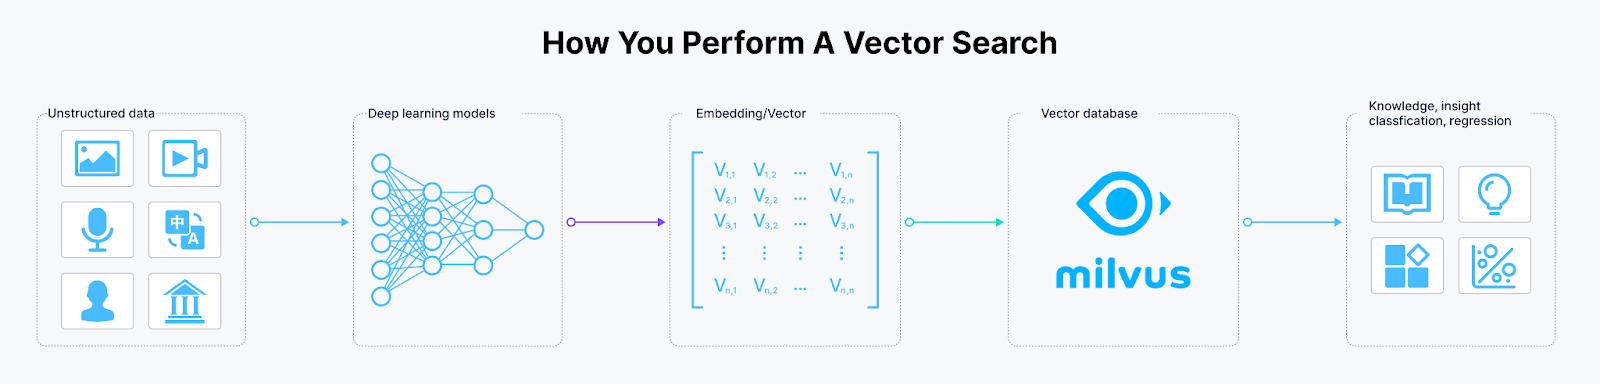


#### WebUI : http://127.0.0.1:9091/webui/

#### Milvus 컨테이너 시작
bash standalone_embed.sh start

#### Milvus 컨테이너 중지
bash standalone_embed.sh stop

#### Milvus 컨테이너 삭제
bash standalone_embed.sh delete

#### 벡터 데이터베이스 사용

In [15]:
# from pymilvus import MilvusClient
# from pymilvus import connections, db

# # 벡터 데이터베이스 생성
# client = MilvusClient("milvus_demo.db")

# # 컬렉션 만들기
# if client.has_collection(collection_name="demo_collection"):
#     client.drop_collection(collection_name="demo_collection")
#     client.create_collection(collection_name="demo_collection", dimension=768)

# conn = connections.connect(host="127.0.0.1", port=19530)


## 2.3 Ollama(오픈소스LLM 로컬 실행도구) 설치 
https://ollama.com/download/

## 2.4 Gemma3(sLLM) 실행
ollama run gemma3

## 2.5 Observability & Tracing 설정
- https://langfuse.com/docs/integrations/langchain/tracing

In [16]:
import os

# Get keys for your project from the project settings page
# https://cloud.langfuse.com
os.environ["LANGFUSE_SECRET_KEY"] = "sk-lf-2f27133e-a88e-489e-a66f-8ec15237515b"
os.environ["LANGFUSE_PUBLIC_KEY"] = "pk-lf-662fd666-39c7-491b-8223-d02b7380fc4c"
os.environ["LANGFUSE_HOST"] = "https://us.cloud.langfuse.com" 

In [17]:
from langfuse import Langfuse
from langfuse.callback import CallbackHandler

langfuse_handler = CallbackHandler()
langfuse = Langfuse()

# 정상 작동 확인
assert langfuse_handler.auth_check()
assert langfuse.auth_check()

## 2.6 RAG 파이프라인 개발

### 프롬프트 설정

In [18]:
import os
from pathlib import Path
from tempfile import mkdtemp
from pprint import pprint
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_docling.loader import ExportType

load_dotenv()
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# 문서 및 사용 모델 설정
pdf_file = "2025년 적용 최저임금 안내문.pdf"
FILE_PATH = [pdf_file]
EMBED_MODEL_ID = "Alibaba-NLP/gte-multilingual-base" 
RERANKER_MODEL_ID = "Alibaba-NLP/gte-multilingual-reranker-base"  
EXPORT_TYPE = ExportType.DOC_CHUNKS  

# 프롬프트 
RAG_PROMPT_TEMPLATE = """
Context information is below.

{context}

Given the context information and not prior knowledge, answer the query.
Query: {input}
Answer (in 한국어):
"""

RAG_PROMPT = PromptTemplate.from_template(RAG_PROMPT_TEMPLATE)

python-dotenv could not parse statement starting at line 5


### 문서 로딩 및 청킹
- Docling을 사용하여 문서를 로드하고 청킹 과정을 수행함  
- DoclingLoader는 두 가지 모드 지원:  
    -  ExportType.MARKDOWN: 각 입력 문서를 하나의 LangChain 문서로 변환   
    - ExportType.DOC_CHUNKS: 각 문서를 청크로 분할하여 개별 LangChain 문서로 변환 (기본값)


In [19]:
from langchain_docling import DoclingLoader
from docling.chunking import HybridChunker


loader = DoclingLoader(
    file_path=FILE_PATH,  
    export_type=ExportType.DOC_CHUNKS,  
    chunker=HybridChunker(tokenizer=EMBED_MODEL_ID)
)

# 문서 로드
docs = loader.load()

print(f"{len(docs)} 개 문서 로드")

# 청크 확인
print(docs[0])

26 개 문서 로드
page_content='상담전화국번없이' metadata={'source': '2025년 적용 최저임금 안내문.pdf', 'dl_meta': {'schema_name': 'docling_core.transforms.chunker.DocMeta', 'version': '1.0.0', 'doc_items': [{'self_ref': '#/texts/2', 'parent': {'$ref': '#/body'}, 'children': [], 'content_layer': 'body', 'label': 'text', 'prov': [{'page_no': 1, 'bbox': {'l': 145.802, 't': 555.481, 'r': 196.677, 'b': 550.297, 'coord_origin': 'BOTTOMLEFT'}, 'charspan': [0, 8]}]}], 'origin': {'mimetype': 'application/pdf', 'binary_hash': 15251392578798886029, 'filename': '2025년 적용 최저임금 안내문.pdf'}}}


In [20]:
print(docs[1].page_content)

서울지방고용노동청
서울지방고용노동청, 1 = 02)2231-0009. 서울지방고용노동청, 2 = 서울남부지청. 서울지방고용노동청, 3 = 02)2639-2100. 서울강남지청, 1 = 02)584-0009. 서울강남지청, 2 = 서울북부지청. 서울강남지청, 3 = 02)950-9880. 서울동부지청, 1 = 02)403-0009. 서울동부지청, 2 = 서울관악지청. 서울동부지청, 3 = 02)3281-0009. 서울서부지청, 1 = 02)713-0009. 서울서부지청, 2 = . 서울서부지청, 3 = 


In [21]:
print(docs[1].metadata)

{'source': '2025년 적용 최저임금 안내문.pdf', 'dl_meta': {'schema_name': 'docling_core.transforms.chunker.DocMeta', 'version': '1.0.0', 'doc_items': [{'self_ref': '#/tables/0', 'parent': {'$ref': '#/body'}, 'children': [], 'content_layer': 'body', 'label': 'table', 'prov': [{'page_no': 1, 'bbox': {'l': 29.969223022460938, 't': 534.1775093078613, 'r': 238.0137939453125, 'b': 464.79359436035156, 'coord_origin': 'BOTTOMLEFT'}, 'charspan': [0, 0]}]}], 'headings': ['서울지방고용노동청'], 'origin': {'mimetype': 'application/pdf', 'binary_hash': 15251392578798886029, 'filename': '2025년 적용 최저임금 안내문.pdf'}}}


### 벡터 저장소 경로 및 검색 설정

In [22]:
MILVUS_URI = "./milvus_example.db"  # 로컬 벡터 저장소 사용
# MILVUS_URI = "http://localhost:19530"  # Docker Mlvus 서버 사용

### 임베딩벡터 생성 및 저장
- Hugging Face 모델을 사용하여 임베딩벡터 생성     
- 생성한 임베딩벡터를 Milvus 벡터저장소에 저장

In [23]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_milvus import Milvus


embedding = HuggingFaceEmbeddings(model_name=EMBED_MODEL_ID, model_kwargs={"trust_remote_code": True})

# Milvus 벡터 저장소 설정
vectorstore = Milvus.from_documents(
    documents=docs,  
    embedding=embedding, 
    collection_name="docling", 
    connection_args={
        "uri": MILVUS_URI, 
        "db_name": "default"  
    },
    index_params={
        "index_type": "FLAT", 
        "metric_type": "COSINE",  
    },
    drop_old=True,  # 기존 컬렉션 삭제
)

python-dotenv could not parse statement starting at line 5
Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### 벡터데이터 베이스 확인
- WebUI : http://127.0.0.1:9091/webui/

In [24]:
from langchain_huggingface import HuggingFaceEndpoint
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder

# 검색기 초기화
base_retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

# CrossEncoderReranker 모델을 사용한 re-ranker 초기화 (top n: 3)
re_ranker = CrossEncoderReranker(
    model=HuggingFaceCrossEncoder(model_name=RERANKER_MODEL_ID, model_kwargs={"trust_remote_code": True}),
    top_n=3
)

# CrossEncoderReranker를 사용한 retriever 초기화
cross_encoder_reranker_retriever = ContextualCompressionRetriever(
    base_compressor=re_ranker,
    base_retriever=base_retriever
)

In [25]:
retrieved_docs = cross_encoder_reranker_retriever.invoke("서울 강남지청 전화번호 알려줘")

In [26]:
for doc in retrieved_docs:
    print(doc.page_content)
    print(doc.metadata)
    print("-"*100)

서울지방고용노동청
서울지방고용노동청, 1 = 02)2231-0009. 서울지방고용노동청, 2 = 서울남부지청. 서울지방고용노동청, 3 = 02)2639-2100. 서울강남지청, 1 = 02)584-0009. 서울강남지청, 2 = 서울북부지청. 서울강남지청, 3 = 02)950-9880. 서울동부지청, 1 = 02)403-0009. 서울동부지청, 2 = 서울관악지청. 서울동부지청, 3 = 02)3281-0009. 서울서부지청, 1 = 02)713-0009. 서울서부지청, 2 = . 서울서부지청, 3 = 
{'dl_meta': {'schema_name': 'docling_core.transforms.chunker.DocMeta', 'version': '1.0.0', 'doc_items': [{'self_ref': '#/tables/0', 'parent': {'$ref': '#/body'}, 'children': [], 'content_layer': 'body', 'label': 'table', 'prov': [{'page_no': 1, 'bbox': {'l': 29.969223022460938, 't': 534.1775093078613, 'r': 238.0137939453125, 'b': 464.79359436035156, 'coord_origin': 'BOTTOMLEFT'}, 'charspan': [0, 0]}]}], 'headings': ['서울지방고용노동청'], 'origin': {'mimetype': 'application/pdf', 'binary_hash': 15251392578798886029, 'filename': '2025년 적용 최저임금 안내문.pdf'}}, 'pk': 457248713054093313, 'source': '2025년 적용 최저임금 안내문.pdf'}
----------------------------------------------------------------------------------------------------
상담

## 2.7 RAG 테스트

In [27]:
from langchain_ollama import ChatOllama

llm = ChatOllama(model="gemma3", temperature=0.0)
llm.invoke("서울 강남지청 전화번호 알려줘")

AIMessage(content='서울 강남경찰서 전화번호는 다음과 같습니다.\n\n*   **전화번호:** 02-729-6111\n*   **주소:** 서울특별시 강남구 테헤란로 88\n\n**참고:**\n\n*   강남경찰서는 강남구 전체를 관할합니다.\n*   긴급 상황 발생 시 112로 연락주세요.', additional_kwargs={}, response_metadata={'model': 'gemma3', 'created_at': '2025-04-10T06:10:24.699059Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1948018666, 'load_duration': 55455750, 'prompt_eval_count': 18, 'prompt_eval_duration': 469926042, 'eval_count': 91, 'eval_duration': 1421872833, 'message': Message(role='assistant', content='', images=None, tool_calls=None), 'model_name': 'gemma3'}, id='run-05817d32-d254-4a35-ab10-56ad70d44069-0', usage_metadata={'input_tokens': 18, 'output_tokens': 91, 'total_tokens': 109})

In [28]:
from langchain_core.runnables import RunnablePassthrough

prompt = PromptTemplate.from_template(RAG_PROMPT_TEMPLATE)

# 문서 포맷팅 함수
def format_docs(docs):
    """문서 출처를 포함한 문서 포맷팅"""
    return "\n\n".join([
        f"Source: {doc.metadata.get('source', 'Unknown')}\n\n"
        f"{doc.page_content}\n\n"
        for doc in docs
    ])

# RAG 체인 생성 (context를 함께 전달하여 생성)
rag_chain = (
    {
        "source": cross_encoder_reranker_retriever,
        "input": RunnablePassthrough()
    } | RunnablePassthrough.assign(
        answer={"context": lambda x: format_docs(x["source"]), "input": lambda x: x["input"] } | prompt | llm
    )
)

In [29]:
# 질문 
question = "서울 강남지청 전화번호 알려줘"
response = rag_chain.invoke(
    question,
    config={"callbacks":[langfuse_handler]}
)
print(response)

{'source': [Document(metadata={'dl_meta': {'schema_name': 'docling_core.transforms.chunker.DocMeta', 'version': '1.0.0', 'doc_items': [{'self_ref': '#/tables/0', 'parent': {'$ref': '#/body'}, 'children': [], 'content_layer': 'body', 'label': 'table', 'prov': [{'page_no': 1, 'bbox': {'l': 29.969223022460938, 't': 534.1775093078613, 'r': 238.0137939453125, 'b': 464.79359436035156, 'coord_origin': 'BOTTOMLEFT'}, 'charspan': [0, 0]}]}], 'headings': ['서울지방고용노동청'], 'origin': {'mimetype': 'application/pdf', 'binary_hash': 15251392578798886029, 'filename': '2025년 적용 최저임금 안내문.pdf'}}, 'pk': 457248713054093313, 'source': '2025년 적용 최저임금 안내문.pdf'}, page_content='서울지방고용노동청\n서울지방고용노동청, 1 = 02)2231-0009. 서울지방고용노동청, 2 = 서울남부지청. 서울지방고용노동청, 3 = 02)2639-2100. 서울강남지청, 1 = 02)584-0009. 서울강남지청, 2 = 서울북부지청. 서울강남지청, 3 = 02)950-9880. 서울동부지청, 1 = 02)403-0009. 서울동부지청, 2 = 서울관악지청. 서울동부지청, 3 = 02)3281-0009. 서울서부지청, 1 = 02)713-0009. 서울서부지청, 2 = . 서울서부지청, 3 = '), Document(metadata={'dl_meta': {'schema_name': 'docling

In [30]:
print(response["source"])   

[Document(metadata={'dl_meta': {'schema_name': 'docling_core.transforms.chunker.DocMeta', 'version': '1.0.0', 'doc_items': [{'self_ref': '#/tables/0', 'parent': {'$ref': '#/body'}, 'children': [], 'content_layer': 'body', 'label': 'table', 'prov': [{'page_no': 1, 'bbox': {'l': 29.969223022460938, 't': 534.1775093078613, 'r': 238.0137939453125, 'b': 464.79359436035156, 'coord_origin': 'BOTTOMLEFT'}, 'charspan': [0, 0]}]}], 'headings': ['서울지방고용노동청'], 'origin': {'mimetype': 'application/pdf', 'binary_hash': 15251392578798886029, 'filename': '2025년 적용 최저임금 안내문.pdf'}}, 'pk': 457248713054093313, 'source': '2025년 적용 최저임금 안내문.pdf'}, page_content='서울지방고용노동청\n서울지방고용노동청, 1 = 02)2231-0009. 서울지방고용노동청, 2 = 서울남부지청. 서울지방고용노동청, 3 = 02)2639-2100. 서울강남지청, 1 = 02)584-0009. 서울강남지청, 2 = 서울북부지청. 서울강남지청, 3 = 02)950-9880. 서울동부지청, 1 = 02)403-0009. 서울동부지청, 2 = 서울관악지청. 서울동부지청, 3 = 02)3281-0009. 서울서부지청, 1 = 02)713-0009. 서울서부지청, 2 = . 서울서부지청, 3 = '), Document(metadata={'dl_meta': {'schema_name': 'docling_core.trans

In [31]:
print(response["answer"].content) 

서울강남지청, 1 = 02)584-0009


In [32]:
# 질문 
question = "최저임금 적용 제외 근로자는?"
response = rag_chain.invoke(
    question,
    config={"callbacks":[langfuse_handler]}
)
print(response)

{'source': [Document(metadata={'dl_meta': {'schema_name': 'docling_core.transforms.chunker.DocMeta', 'version': '1.0.0', 'doc_items': [{'self_ref': '#/texts/59', 'parent': {'$ref': '#/body'}, 'children': [], 'content_layer': 'body', 'label': 'text', 'prov': [{'page_no': 2, 'bbox': {'l': 293.016, 't': 436.105, 'r': 505.626, 'b': 417.04, 'coord_origin': 'BOTTOMLEFT'}, 'charspan': [0, 69]}]}], 'headings': ['근로기준법상 근로자(정규직·비정규직, 파트타임, 아르바이트, 청소년 근로자, 외국인 근로자 등)에게는 모두 적용됩니다.'], 'origin': {'mimetype': 'application/pdf', 'binary_hash': 15251392578798886029, 'filename': '2025년 적용 최저임금 안내문.pdf'}}, 'pk': 457248713054093328, 'source': '2025년 적용 최저임금 안내문.pdf'}, page_content='근로기준법상 근로자(정규직·비정규직, 파트타임, 아르바이트, 청소년 근로자, 외국인 근로자 등)에게는 모두 적용됩니다.\n다만, 정신 또는 신체장애로 근로능력이 현저히 낮아 고용노동부장관의 적용제외 인가를 받은 사람에 대하여는 적용되지 않습니다.'), Document(metadata={'dl_meta': {'schema_name': 'docling_core.transforms.chunker.DocMeta', 'version': '1.0.0', 'doc_items': [{'self_ref': '#/texts/62', 'parent': {'$ref': '#/body'}, 'childr

In [33]:
print(response["answer"].content) 

정신 또는 신체장애로 근로능력이 현저히 낮아 고용노동부장관의 적용제외 인가를 받은 사람입니다.
